In [ ]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
from keras.models import Model
import numpy as np
import cv2
import os

from imutils import paths

In [ ]:
prototxtPath=os.path.sep.join([r'/content/drive/MyDrive/MaskDataset\mobilenet_v2.model/deploy.prototxt'])

In [ ]:
weightsPath=os.path.sep.join([r'/content/drive/MyDrive/MaskDataset\mobilenet_v2.model/res10_300x300_ssd_iter_140000.caffemodel'])

In [ ]:
prototxtPath

'/content/drive/MyDrive/MaskDataset\\mobilenet_v2.model/deploy.prototxt'

In [ ]:
weightsPath

'/content/drive/MyDrive/MaskDataset\\mobilenet_v2.model/res10_300x300_ssd_iter_140000.caffemodel'

In [ ]:
net=cv2.dnn.readNet(prototxtPath,weightsPath)

In [ ]:
net

<dnn_Net 0x7f8357e52d10>

In [ ]:
model=load_model(r'/content/drive/MyDrive/MaskDataset')

In [ ]:
image=cv2.imread(r'/content/drive/MyDrive/MaskDataset/example_03.png')

In [ ]:
image

array([[[152, 153, 148],
        [149, 150, 146],
        [149, 150, 146],
        ...,
        [147, 150, 148],
        [145, 148, 146],
        [146, 149, 147]],

       [[147, 149, 146],
        [148, 151, 146],
        [150, 152, 147],
        ...,
        [150, 152, 149],
        [146, 149, 147],
        [145, 148, 146]],

       [[145, 148, 147],
        [147, 150, 147],
        [150, 154, 149],
        ...,
        [153, 153, 151],
        [150, 152, 150],
        [147, 151, 149]],

       ...,

       [[131, 130, 134],
        [129, 129, 132],
        [129, 129, 130],
        ...,
        [173, 177, 181],
        [176, 182, 186],
        [180, 187, 191]],

       [[133, 131, 136],
        [127, 128, 130],
        [130, 133, 133],
        ...,
        [179, 184, 187],
        [181, 187, 190],
        [183, 191, 194]],

       [[130, 130, 135],
        [127, 128, 133],
        [127, 129, 132],
        ...,
        [184, 189, 192],
        [184, 190, 193],
        [186, 193, 196]]

In [ ]:
(h,w)=image.shape[:2]

In [ ]:
(h,w)

(400, 600)

In [ ]:
blob=cv2.dnn.blobFromImage(image,1.0,(300,300),(104.0,177.0,123.0))

In [ ]:
blob

array([[[[ 46.,  44.,  46., ...,  47.,  44.,  41.],
         [ 43.,  45.,  44., ...,  43.,  46.,  43.],
         [ 43.,  44.,  41., ...,  41.,  47.,  46.],
         ...,
         [ 26.,  27.,  34., ...,  45.,  63.,  73.],
         [ 26.,  27.,  32., ...,  52.,  69.,  76.],
         [ 25.,  25.,  33., ...,  62.,  77.,  80.]],

        [[-26., -27., -24., ..., -26., -27., -29.],
         [-27., -25., -26., ..., -27., -26., -27.],
         [-26., -25., -25., ..., -29., -25., -26.],
         ...,
         [-48., -45., -35., ..., -29.,  -8.,   6.],
         [-47., -44., -37., ..., -22.,  -1.,  10.],
         [-48., -46., -36., ..., -12.,   7.,  14.]],

        [[ 24.,  22.,  22., ...,  24.,  24.,  23.],
         [ 24.,  24.,  22., ...,  22.,  25.,  25.],
         [ 25.,  25.,  22., ...,  20.,  26.,  26.],
         ...,
         [ 10.,   9.,  20., ...,  28.,  48.,  62.],
         [ 10.,  10.,  17., ...,  37.,  56.,  67.],
         [ 11.,  10.,  20., ...,  46.,  64.,  71.]]]], dtype=float32)

In [ ]:
blob.shape

(1, 3, 300, 300)

In [ ]:
net.setInput(blob)
detections=net.forward()

In [ ]:
detections

array([[[[0.        , 1.        , 0.9996724 , ..., 0.18173477,
          0.43292862, 0.46098718],
         [0.        , 1.        , 0.81118375, ..., 0.02572085,
          0.9942617 , 0.34080845],
         [0.        , 1.        , 0.43454096, ..., 0.19513154,
          0.65238404, 0.6432173 ],
         ...,
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ]]]], dtype=float32)

In [ ]:
for i in range(0,detections.shape[2]):
    confidence=detections[0,0,i,2]
    
    
    if confidence>0.5:
        box=detections[0,0,i,3:7]*np.array([w,h,w,h])
        (startX,startY,endX,endY)=box.astype('int')
        
        
        (startX,startY)=(max(0,startX),max(0,startY))
        (endX,endY)=(min(w-1,endX), min(h-1,endY))
        
        
        #extract the face ROI, convert it from BGR to RGB channel, resize it to 224,224 and preprocess it
        face=image[startY:endY, startX:endX]
        face=cv2.cvtColor(face,cv2.COLOR_BGR2RGB)
        face=cv2.resize(face,(224,224))
        face=img_to_array(face)
        face=preprocess_input(face)
        face=np.expand_dims(face,axis=0)
        
        (mask,withoutMask)=model.predict(face)[0]
        
        #determine the class label and color we will use to draw the bounding box and text
        label='Mask' if mask>withoutMask else 'No Mask'
        color=(0,255,0) if label=='Mask' else (0,0,255)
        
       
        label="{}: {:.2f}%".format(label,max(mask,withoutMask)*100)
        
        #display the label and bounding boxes
        cv2.putText(image,label,(startX,startY-10),cv2.FONT_HERSHEY_SIMPLEX,0.45,color,2)
        cv2.rectangle(image,(startX,startY),(endX,endY),color,2)
        

In [ ]:
from skimage import io

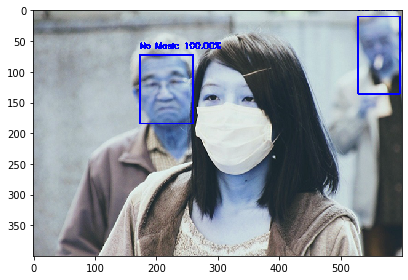

In [ ]:
io.imshow(image)